In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

df = pd.read_csv('../../data/sheffield_weather_station.csv', 
                 skiprows=8, 
                 delimiter=' ', 
                 skipinitialspace=True)
rainfall = df["rain"].values

df = pd.read_csv('../../data/female_literacy_fertility.csv')
fertility = df["fertility"].values
illiteracy = (100 - df["female literacy"].values)

df = pd.read_csv('../../data/mlb_nohitters.csv')
nohitter_times = df['game_number'].values

### Generating a permutation sample

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

### Instructions
    - Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
    - Use np.random.permutation() to permute the concatenated array.
    - Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
    - Return perm_sample_1 and perm_sample_2.

In [2]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the NumPy arrays rain_june and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], where permuted_data = np.random.permutation(np.concatenate((data_1, data_2))).

### Instructions
    - Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
        - Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
        - Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
        - Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
    - Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.
    - Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit submit to view the plot!

In [4]:
df = pd.read_csv('../../data/sheffield_weather_station.csv', 
                 skiprows=8, 
                 delimiter=' ', 
                 skipinitialspace=True)

rain_june = df[df['mm'] == 6]["rain"].values
rain_november = df[df['mm'] == 11]["rain"].values

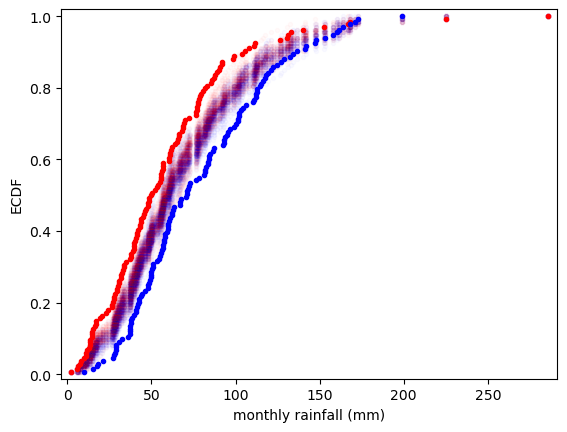

In [5]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Generating permutation replicates

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

### Instructions
    - Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
        = Initialize an array to hold the permutation replicates using np.empty().
        = Write a for loop to:
            - Compute a permutation sample using your permutation_sample() function
            - Pass the samples into func() to compute the replicate and store the result in your array of replicates.
        = Return the array of replicates.

In [6]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a pandas DataFrame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

### Instructions
    - Use sns.swarmplot() to make a bee swarm plot of the data by specifying the x, y, and data keyword arguments.
    - Label your axes.
    - Show the plot.

In [11]:
df = pd.read_csv('../../data/frog_tongue.csv', 
                 skiprows=14, 
                 delimiter=',', 
                 skipinitialspace=True)
df = df[['ID', 'impact force (mN)']]
df['impact_force'] = df['impact force (mN)'] / 1000.0
df = df.drop('impact force (mN)', axis=1)

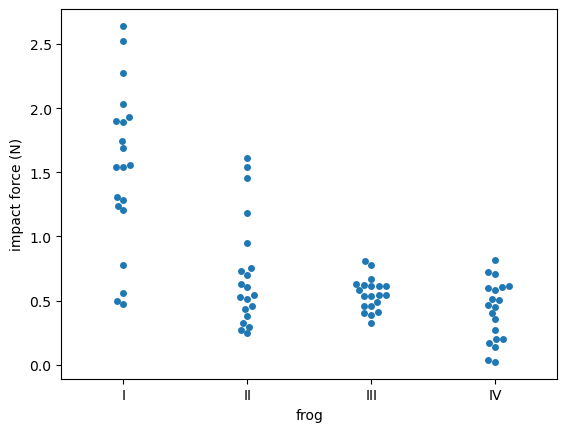

In [12]:
# Make bee swarm plot
_ = sns.swarmplot(x="ID", y="impact_force", data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()